
File 'student_screen_time_raw.csv' loaded successfully!

   Gender  Screen Time (hrs)  Day
0     NaN               0.64  Sun
1       F              10.94  Wed
2   Male               12.08  Sat
3  FEMALE               6.52  Thu
4    male               3.86  Thu

Cleaned dataset saved as 'student_screen_time_cleaned.csv' with 464 rows.

Descriptive Statistics:
Mean: 8.08
Median: 8.265
Mode: 7.6
Std Deviation: 4.33
Variance: 18.72
Min: 0.08
Max: 14.98
Range: 14.9
Q1: 4.4825
Q3: 12.03
IQR: 7.547499999999999


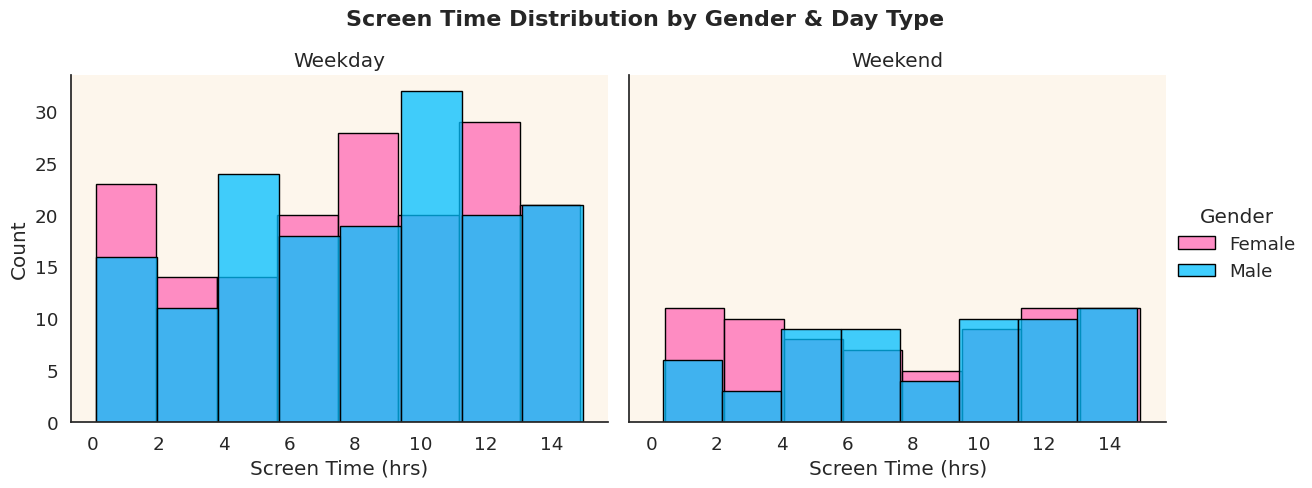

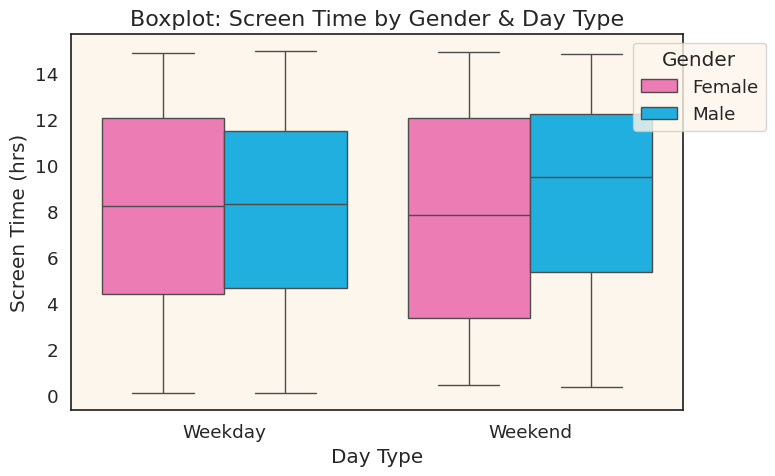

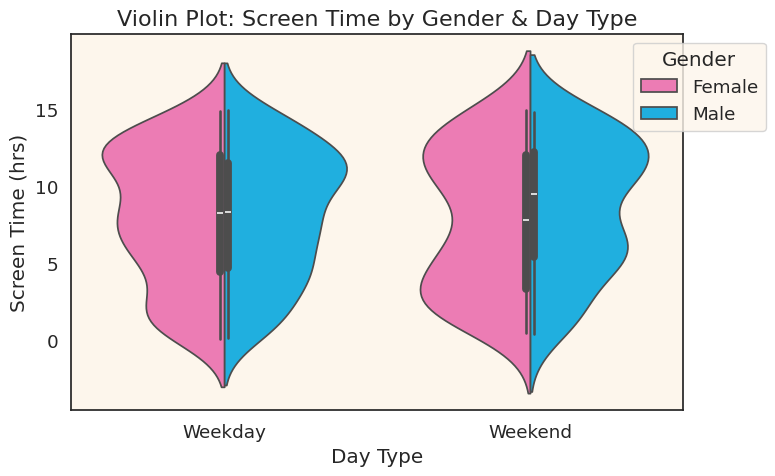

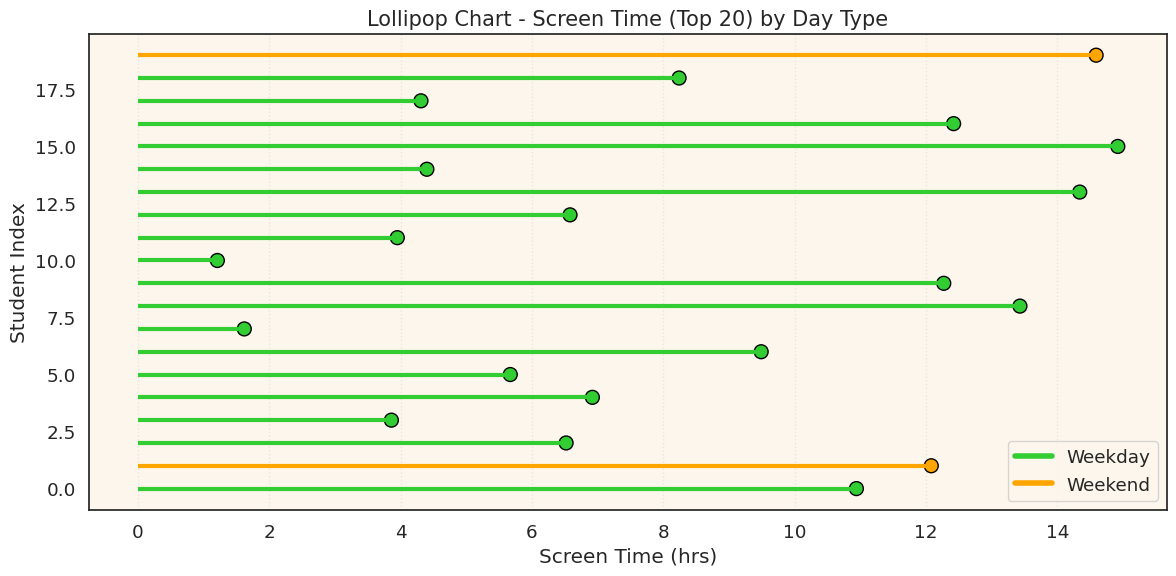

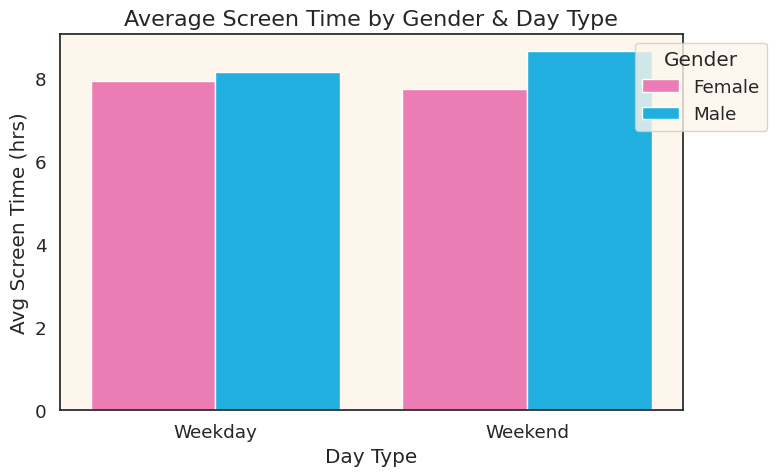

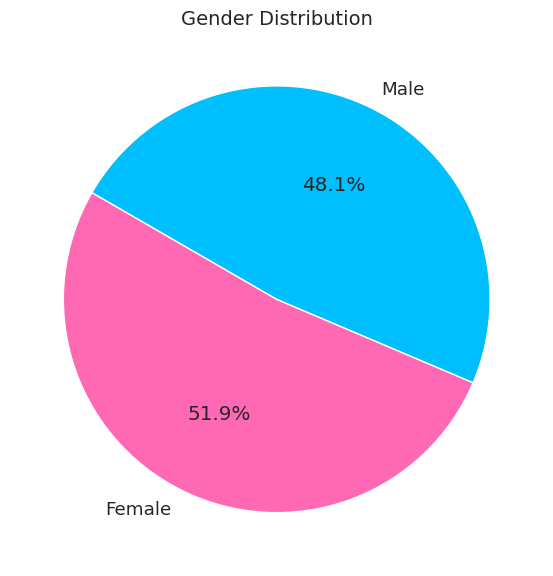


INTERPRETATION:
• The distribution is left-skewed or symmetric.
• No significant outliers detected.
• Median is the better central measure here.


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statistics import mode
import warnings

warnings.filterwarnings("ignore")

sns.set(style='white', font='DejaVu Sans', palette='bright', font_scale=1.2)
plt.rcParams['axes.facecolor'] = '#FDF6EC'

# ---------------------------
# Step 1: Load Dataset
# ---------------------------
file_path = "student_screen_time_raw.csv"
df = pd.read_csv(file_path)
print(f"\nFile '{file_path}' loaded successfully!\n")
print(df.head())

# ---------------------------
# Step 2: Data Cleaning
# ---------------------------

# Standardize Gender
df['Gender'] = df['Gender'].astype(str).str.strip().str.lower()
df['Gender'] = df['Gender'].replace({
    'm': 'Male',
    'male': 'Male',
    '1': 'Male',
    'f': 'Female',
    'female': 'Female',
    '0': 'Female',
    'nan': np.nan
})

# Drop rows with invalid Gender or Screen Time
df = df.dropna(subset=['Gender', 'Screen Time (hrs)'])

# Convert Screen Time to numeric and keep valid range
df['Screen Time (hrs)'] = pd.to_numeric(df['Screen Time (hrs)'], errors='coerce')
df = df[(df['Screen Time (hrs)'] >= 0) & (df['Screen Time (hrs)'] <= 16)]

# Create Day Type if not present
if 'Day Type' not in df.columns:
    if 'Day' in df.columns:
        df['Day Type'] = df['Day'].apply(lambda x: 'Weekend' if str(x).lower() in ['sat', 'sun'] else 'Weekday')
    else:
        np.random.seed(42)
        df['Day Type'] = np.random.choice(['Weekday', 'Weekend'], size=len(df))

# Save cleaned dataset
clean_file_path = "student_screen_time_cleaned.csv"
df.to_csv(clean_file_path, index=False)
print(f"\nCleaned dataset saved as '{clean_file_path}' with {len(df)} rows.\n")

# Load cleaned data
df_cleaned = pd.read_csv(clean_file_path)

# ---------------------------
# Step 3: Descriptive Statistics
# ---------------------------
screen_time = df_cleaned['Screen Time (hrs)']
stats = {
    "Mean": round(screen_time.mean(), 2),
    "Median": screen_time.median(),
    "Mode": mode(screen_time),
    "Std Deviation": round(screen_time.std(), 2),
    "Variance": round(screen_time.var(), 2),
    "Min": screen_time.min(),
    "Max": screen_time.max(),
    "Range": screen_time.max() - screen_time.min(),
    "Q1": screen_time.quantile(0.25),
    "Q3": screen_time.quantile(0.75),
}
stats["IQR"] = stats["Q3"] - stats["Q1"]

print("Descriptive Statistics:")
for k, v in stats.items():
    print(f"{k}: {v}")

# ---------------------------
# Step 4: EDA & Plots
# ---------------------------
gender_palette = {'Male': '#00BFFF', 'Female': '#FF69B4'}
daytype_palette = {'Weekday': '#32CD32', 'Weekend': '#FFA500'}

# Histogram
g = sns.FacetGrid(df_cleaned, col="Day Type", hue="Gender", height=5, aspect=1.2, palette=gender_palette)
g.map(sns.histplot, "Screen Time (hrs)", bins=8, edgecolor="black", multiple='dodge')
g.add_legend(title="Gender")
g.set_titles(col_template="{col_name}")
g.set_axis_labels("Screen Time (hrs)", "Count")
plt.subplots_adjust(top=0.85)
g.fig.suptitle("Screen Time Distribution by Gender & Day Type", fontsize=16, fontweight='bold')
plt.show()

# Boxplot
plt.figure(figsize=(8, 5))
sns.boxplot(x='Day Type', y='Screen Time (hrs)', hue='Gender', data=df_cleaned, palette=gender_palette)
plt.title("Boxplot: Screen Time by Gender & Day Type", fontsize=16)
plt.xlabel("Day Type")
plt.ylabel("Screen Time (hrs)")
plt.legend(title="Gender", loc='upper right', bbox_to_anchor=(1.15, 1))
plt.tight_layout()
plt.show()

# Violin plot
plt.figure(figsize=(8, 5))
sns.violinplot(x='Day Type', y='Screen Time (hrs)', hue='Gender', split=True, data=df_cleaned, palette=gender_palette)
plt.title("Violin Plot: Screen Time by Gender & Day Type", fontsize=16)
plt.legend(title="Gender", loc='upper right', bbox_to_anchor=(1.15, 1))
plt.tight_layout()
plt.show()

# Lollipop Chart - Top 20
plt.figure(figsize=(12, 6))
sample_data = df_cleaned.head(20)
colors = sample_data['Day Type'].map(daytype_palette)
plt.hlines(y=sample_data.index, xmin=0, xmax=sample_data['Screen Time (hrs)'], color=colors, linewidth=3)
plt.scatter(sample_data['Screen Time (hrs)'], sample_data.index, c=colors, s=100, edgecolor='black')
plt.title("Lollipop Chart - Screen Time (Top 20) by Day Type", fontsize=15)
plt.xlabel("Screen Time (hrs)")
plt.ylabel("Student Index")
plt.legend(handles=[
    plt.Line2D([0], [0], color='#32CD32', lw=4, label='Weekday'),
    plt.Line2D([0], [0], color='#FFA500', lw=4, label='Weekend')], loc='lower right')
plt.grid(axis='x', linestyle=':', alpha=0.4)
plt.tight_layout()
plt.show()

# Bar chart - Average Screen Time
avg_data = df_cleaned.groupby(['Day Type', 'Gender'])['Screen Time (hrs)'].mean().reset_index()
plt.figure(figsize=(8, 5))
sns.barplot(data=avg_data, x='Day Type', y='Screen Time (hrs)', hue='Gender', palette=gender_palette)
plt.title("Average Screen Time by Gender & Day Type", fontsize=16)
plt.ylabel("Avg Screen Time (hrs)")
plt.legend(title="Gender", loc='upper right', bbox_to_anchor=(1.15, 1))
plt.tight_layout()
plt.show()

# Pie Chart - Gender Distribution
gender_counts = df_cleaned['Gender'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=150,
        colors=[gender_palette[g] for g in gender_counts.index])
plt.title("Gender Distribution", fontsize=14)
plt.tight_layout()
plt.show()

# ---------------------------
# Step 5: Interpretation
# ---------------------------
print("\nINTERPRETATION:")
if stats["Mean"] > stats["Median"]:
    print("• The distribution is right-skewed (long tail to the right).")
else:
    print("• The distribution is left-skewed or symmetric.")

if any(screen_time > stats["Q3"] + 1.5 * stats["IQR"]):
    print("• Outliers are present based on IQR method.")
else:
    print("• No significant outliers detected.")

print(f"• {'Mean' if stats['Std Deviation'] < 1 else 'Median'} is the better central measure here.")
